In [6]:
## Import Packages

import numpy as np
import pandas as pd


In [7]:
example=["Machine learning is super fun",
"Python is super, super cool",
"Statistics is cool, too",
"Data science is fun",
"Python is great for machine learning",
"I like football",
"Football is great to watch"]

In [8]:
print(example)

['Machine learning is super fun', 'Python is super, super cool', 'Statistics is cool, too', 'Data science is fun', 'Python is great for machine learning', 'I like football', 'Football is great to watch']


In [10]:
## BOW using countvectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer=CountVectorizer(min_df=1,stop_words='english')

X=vectorizer.fit_transform(example)
print(X)
X_df=pd.DataFrame(X.toarray(),index=example,columns=vectorizer.get_feature_names_out())
X_df.head(10)

  (0, 7)	1
  (0, 5)	1
  (0, 11)	1
  (0, 3)	1
  (1, 11)	2
  (1, 8)	1
  (1, 0)	1
  (2, 0)	1
  (2, 10)	1
  (3, 3)	1
  (3, 1)	1
  (3, 9)	1
  (4, 7)	1
  (4, 5)	1
  (4, 8)	1
  (4, 4)	1
  (5, 6)	1
  (5, 2)	1
  (6, 4)	1
  (6, 2)	1
  (6, 12)	1


,cool,data,football,fun,great,learning,like,machine,python,science,statistics,super,watch
Machine learning is super fun,0,0,0,1,0,1,0,1,0,0,0,1,0
"Python is super, super cool",1,0,0,0,0,0,0,0,1,0,0,2,0
"Statistics is cool, too",1,0,0,0,0,0,0,0,0,0,1,0,0
Data science is fun,0,1,0,1,0,0,0,0,0,1,0,0,0
Python is great for machine learning,0,0,0,0,1,1,0,1,1,0,0,0,0
I like football,0,0,1,0,0,0,1,0,0,0,0,0,0
Football is great to watch,0,0,1,0,1,0,0,0,0,0,0,0,1


In [11]:
# Get words that correspond to each column

vectorizer.get_feature_names_out()

array(['cool', 'data', 'football', 'fun', 'great', 'learning', 'like',
       'machine', 'python', 'science', 'statistics', 'super', 'watch'],
      dtype=object)

In [12]:
## Topic Modeling with SVD

from sklearn.decomposition import TruncatedSVD
lsa=TruncatedSVD(2,algorithm='arpack')

X_lsa=lsa.fit_transform(X.asfptype())

In [13]:
X_lsa

array([[ 1.57247271, -0.47650694],
       [ 2.01590517,  1.21491855],
       [ 0.31817376,  0.46663292],
       [ 0.29469888, -0.297151  ],
       [ 1.24575812, -1.21014931],
       [ 0.03797199, -0.38114092],
       [ 0.2405853 , -0.99233284]])

In [14]:
pd.DataFrame(X_lsa,index=example,columns=["component1","component2"])

,component1,component2
Machine learning is super fun,1.572473,-0.476507
"Python is super, super cool",2.015905,1.214919
"Statistics is cool, too",0.318174,0.466633
Data science is fun,0.294699,-0.297151
Python is great for machine learning,1.245758,-1.210149
I like football,0.037972,-0.381141
Football is great to watch,0.240585,-0.992333


In [16]:
xs = [w[0] for w in X_lsa]
ys = [w[1] for w in X_lsa]

In [17]:
xs

[1.5724727103402245,
 2.015905171638841,
 0.3181737564271848,
 0.2946988814869813,
 1.24575811566127,
 0.037971989562138146,
 0.24058530469419062]

In [18]:
ys

[-0.47650694410049527,
 1.2149185500119084,
 0.466632919667336,
 -0.2971510043096569,
 -1.210149310559365,
 -0.3811409173512159,
 -0.9923328405305416]

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


Text(0.5, 1.0, 'Plot of points against LSA principal components')

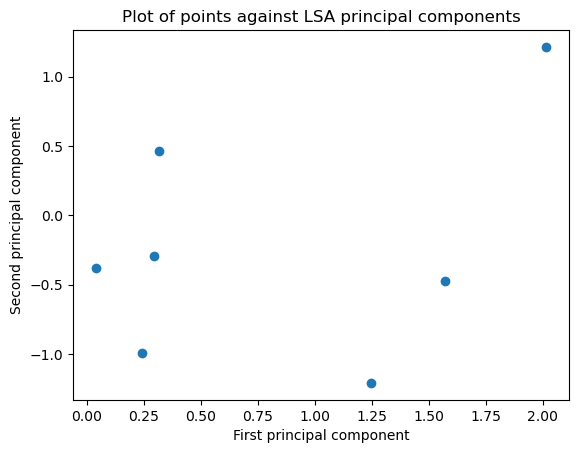

In [19]:
#Visualize the points on the orthogonal plot
%pylab inline
import matplotlib.pyplot as plt
figure()
plt.scatter(xs,ys)
xlabel('First principal component')
ylabel('Second principal component')
title('Plot of points against LSA principal components')

In [21]:
# Compute document similarity using LSA components
similarity = np.asarray(numpy.asmatrix(X_lsa) * numpy.asmatrix(X_lsa).T)
df  = pd.DataFrame(similarity,index=example, columns=example).head(10)
df

,Machine learning is super fun,"Python is super, super cool","Statistics is cool, too",Data science is fun,Python is great for machine learning,I like football,Football is great to watch
Machine learning is super fun,2.699729,2.591039,0.277966,0.605000,2.535565,0.241326,0.851167
"Python is super, super cool",2.591039,5.539901,1.208329,0.233071,1.041097,-0.386507,-0.720606
"Statistics is cool, too",0.277966,1.208329,0.318981,-0.044895,-0.168328,-0.165771,-0.386507
Data science is fun,0.605000,0.233071,-0.044895,0.175146,0.726721,0.124447,0.365773
Python is great for machine learning,2.535565,1.041097,-0.168328,0.726721,3.016375,0.508541,1.500582
I like football,0.241326,-0.386507,-0.165771,0.124447,0.508541,0.146710,0.387354
Football is great to watch,0.851167,-0.720606,-0.386507,0.365773,1.500582,0.387354,1.042606


In [22]:
#Topic modeling with clustering
from sklearn.cluster import KMeans, MiniBatchKMeans

In [24]:
# Clustering the training sentences with K-means technique
modelkmeans = KMeans(n_clusters=2, init='k-means++', max_iter=200, n_init=100)
modelkmeans.fit(X)

KMeans(max_iter=200, n_clusters=2, n_init=100)

In [25]:
for doc in X:
    print(modelkmeans.predict(doc))


[0]
[0]
[1]
[1]
[0]
[1]
[1]
